## Template Matching
Locating the co-ordinates of a template inside a big image.

    1. Scan through the main image.
    2. Extract image blocks of size same as template.
    3. Compare the image block with template using "Sum of squared difference".
    4. Store results of each image block comparision in a result array.
    5. Find the index of minimum difference from this result array.
    6. This index will be the location of our template.

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import time

In [2]:

def ssd(template, img_block):
    # the 'Mean Squared Error' between the two images is the
    # sum of the squared difference between the two images;
    # NOTE: the two images must have the same dimension

    err = np.sum((np.array(template) - np.array(img_block) ** 2))

    return err

In [3]:
def scan_image(template, img) :
    '''
    Function to divide the image into blocks 
    same as template size and comparing with
    template.
    
    Return: An array of difference values calculated
    '''
    
    # Getting dimensions 
    t_width, t_height = template.shape[: : -1]
    i_width, i_height = img.shape[: : -1]

    # Scanning window
    x_axis_leng = i_width - t_width         # how far to scan on x axis of image
    y_axis_hgt =  i_height - t_height       # how far to scan on y axis of image
    
    # To store ssd results
    res = []

    window_size = template.shape

    start_time = time.time()
    for y in range(0, y_axis_hgt+1 ):       # vertical
        line_score = []
        for x in range(0, x_axis_leng+1):   # horizontally
            patch_holder = img[y : y + t_height, x: x + t_width] 
    
            # Calculate ssd between template and image block
            score = ssd(template, patch_holder)
            line_score.append(score)
        
        res.append(line_score) 

    end_time = time.time()
    print(f'Time taken: {round(end_time-start_time,4)} sec')  
    
    return res
    

## Image-1 with  Bug placement 

Template shape: (363, 445)
Image shape: (3472, 4911)


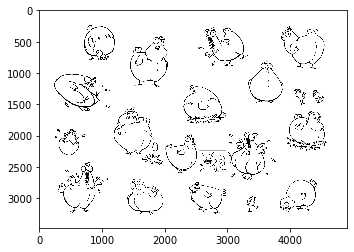

In [4]:
# Reading main image and converting to grayscale
image_1 = Image.open('image_1.png')
img_gray = image_1.convert("L")
img_1 = np.asarray(img_gray)

# Reading template and connverting it to grayscale
temp = Image.open('Bug.png')
temp_gray = temp.convert("L")
template = np.asarray(temp_gray)

# Checking dimensions
print(f'Template shape: {template.shape}')
print(f'Image shape: {img_1.shape}')

#print(len(template[0]))
#print(len(img_1[0]))

# Display Image
plt.imshow(img_1, cmap = 'gray')
plt.show()

In [17]:
# Compare template and first image
result_1 = scan_image(template, img_1)

Time taken: 6650.5696 sec


Getting co-ordinates from above result

In [18]:
# converting results to numpy array
final_result_1 = np.array(result_1)
    
# Finding the location of minimum ssd
min_loc_1 = np.where(final_result_1 == np.min(final_result_1))[::-1] 

# extracting coordinates of template from location results
top_left_1 =  (min_loc_1[0][0], min_loc_1[1][0])  

print(f'Bug location: {top_left_1}')

Bug location: (2543, 2235)


##### Marking the Bug inside the image

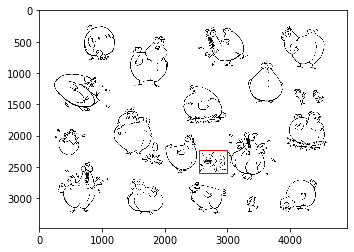

In [19]:
# PLotting the image with marked bug position
figure, ax = plt.subplots()

rect_1 = patches.Rectangle(top_left_1, 445,363, edgecolor='r', facecolor="none")

ax.imshow(img_1, cmap = 'gray')
ax.add_patch(rect_1)
plt.show()


## Image-2 with different location of Bug placement 

Template shape: (363, 445)
Image shape: (3472, 4911)


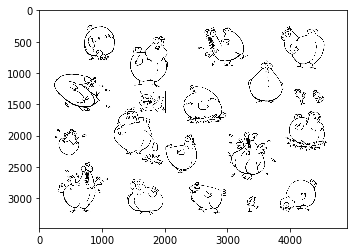

In [20]:
# Reading main image and converting to grayscale
image_2 = Image.open('image_2.png')
img2_gray = image_2.convert("L")
img_2 = np.asarray(img2_gray)


# Checking dimensions
print(f'Template shape: {template.shape}')
print(f'Image shape: {img_2.shape}')

#print(len(template[0]))
#print(len(img_2[0]))

plt.imshow(img_2, cmap = 'gray')
plt.show()

In [ ]:
# Compare template and first image
result_2 = scan_image(template, img_2)

In [54]:
# converting results to numpy array
final_result_2 = np.array(result_2)
    
# Finding the location of minimum ssd
min_loc_2 = np.where(final_result_2 == np.min(final_result_2))[::-1] 

# extracting coordinates of template from location results
top_left_2 =  (min_loc_2[0][0], min_loc_2[1][0])  

print(f'Bug location: {top_left_2}')

Bug location: (1575, 1286)


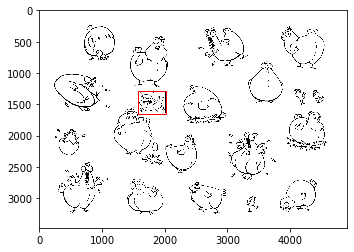

In [55]:
# PLotting the image with marked bug position
figure, ax = plt.subplots()

rect_2 = patches.Rectangle(top_left_2, 445,363, edgecolor='r', facecolor="none")

ax.imshow(img_2, cmap = 'gray')
ax.add_patch(rect_2)
plt.show()

## Image-3 with different location of Bug placement 

Template shape: (363, 445)
Image shape: (3472, 4911)


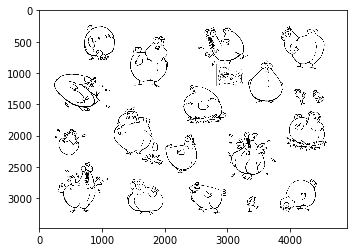

In [68]:
# Reading main image and converting to grayscale
image_3 = Image.open('image_3.png')
img3_gray = image_3.convert("L")
img_3 = np.asarray(img3_gray)

# Checking dimensions
print(f'Template shape: {template.shape}')
print(f'Image shape: {img_3.shape}')

#print(len(template[0]))
#print(len(img[0]))

# Display Image
plt.imshow(img_3, cmap = 'gray')
plt.show()

In [57]:
# Compare template and first image
result_3 = scan_image(template, img_3)

Time taken: 6618.3087 sec


In [59]:
# converting results to numpy array
final_result_3 = np.array(result_3)
    
# Finding the location of minimum ssd
min_loc_3 = np.where(final_result_3 == np.min(final_result_3))[::-1] 

# extracting coordinates of template from location results
top_left_3 =  (min_loc_3[0][0], min_loc_3[1][0])  

print(f'Bug location: {top_left_3}')

Bug location: (2826, 855)


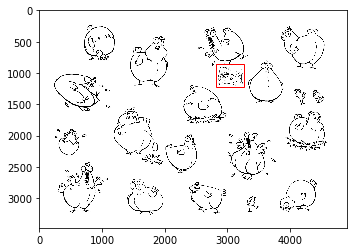

In [60]:
# PLotting the image with marked bug position
figure, ax = plt.subplots()

rect_3 = patches.Rectangle(top_left_3, 445,363, edgecolor='r', facecolor="none")

ax.imshow(img_3, cmap = 'gray')
ax.add_patch(rect_3)
plt.show()